<a href="https://colab.research.google.com/github/Vijaycriss/Ml_project/blob/main/Credit_risk_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/credit_customers (DS).csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
df.dtypes


checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df['checking_status']= df['checking_status'].str.replace('<0', '0')
df['checking_status']= df['checking_status'].str.replace('0<=X<200', '100')
df['checking_status']= df['checking_status'].str.replace('>=200', '200')


In [ ]:
df['employment']= df['employment'].str.replace('>=7', '7')
df['employment']= df['employment'].str.replace('1<=X<4', '3')
df['employment']= df['employment'].str.replace('<1', '1')
df['employment']= df['employment'].str.replace('4<=X<7', '5')

In [ ]:
df['checking_status'].unique()


array(['0', '100', 'no checking', '200'], dtype=object)

In [ ]:
df['employment'].unique()

array(['7', '3', '5', 'unemployed', '1'], dtype=object)

In [ ]:
df['checking_status'].value_counts()

no checking    394
0              274
100            269
200             63
Name: checking_status, dtype: int64

In [ ]:
df['employment'].value_counts()

3             339
7             253
5             174
1             172
unemployed     62
Name: employment, dtype: int64

In [ ]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [ ]:
df['class'].head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: object

In [108]:
catogrical_var = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']
float_var = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

In [109]:
#One Hot encoding
cat_transform = pd.get_dummies(df[catogrical_var])

In [98]:
cat_transform.shape

(1000, 56)

In [110]:
df_final = pd.concat([df[float_var], cat_transform], axis = 1)
df_final.shape

(1000, 63)

In [ ]:
df_final.columns

In [87]:
df_final['class_bad'].value_counts()

0    700
1    300
Name: class_bad, dtype: int64

In [88]:
df_final['class_good'].value_counts()

1    700
0    300
Name: class_good, dtype: int64

In [114]:
x_drop = df_final.drop(['class_bad','class_good'],axis=1)
y_var=df_final['class_good']
x_drop.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0,checking_status_100,checking_status_200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [115]:
#Spliting data

x = x_drop
y = y_var

In [116]:
x.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0,checking_status_100,checking_status_200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [117]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: class_good, dtype: uint8

In [ ]:
y.value_counts()

1    700
0    300
Name: class_good, dtype: int64

In [ ]:
y.shape

(1000,)

In [118]:
#Training data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')



In [154]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
confusion = confusion_matrix(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')


Accuracy: 0.716
Confusion Matrix:
[[  4  68]
 [  3 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.06      0.10        72
           1       0.72      0.98      0.83       178

    accuracy                           0.72       250
   macro avg       0.65      0.52      0.47       250
weighted avg       0.68      0.72      0.62       250



In [131]:
#SVM algorithm
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear')

linear_svm.fit(X_train, y_train)

y_pred_svm = linear_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
confusion = confusion_matrix(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

rbf_svm = SVC(kernel='rbf')

rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rbf)
confusion = confusion_matrix(y_test, y_pred_rbf)
report = classification_report(y_test, y_pred_rbf)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 0.724
Confusion Matrix:
[[ 31  41]
 [ 28 150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        72
           1       0.79      0.84      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.64      0.64       250
weighted avg       0.71      0.72      0.72       250

Accuracy: 0.724
Confusion Matrix:
[[  4  68]
 [  1 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.06      0.10        72
           1       0.72      0.99      0.84       178

    accuracy                           0.72       250
   macro avg       0.76      0.52      0.47       250
weighted avg       0.74      0.72      0.63       250



In [155]:
#Accuracy of each model
accuracy_LG = accuracy_score(y_test, y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
accuracy_SVM = accuracy_score(y_test, y_pred_rbf)

print(f'Accuracy: {accuracy_LG}')
print(f'Accuracy: {accuracy_KNN}')
print(f'Accuracy: {accuracy_SVM}')

Accuracy: 0.752
Accuracy: 0.716
Accuracy: 0.724


In [ ]:
print(X_test.head())

In [ ]:
print(y_test.head())

In [ ]:
print("Predictions:", y_pred)
print("Predictions:", y_pred_knn)
print("Predictions:", y_pred_rbf)

In [143]:
confusion_LG = confusion_matrix(y_test, y_pred)
confusion_KNN = confusion_matrix(y_test, y_pred_knn)
confusion_SVM = confusion_matrix(y_test, y_pred_rbf)

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

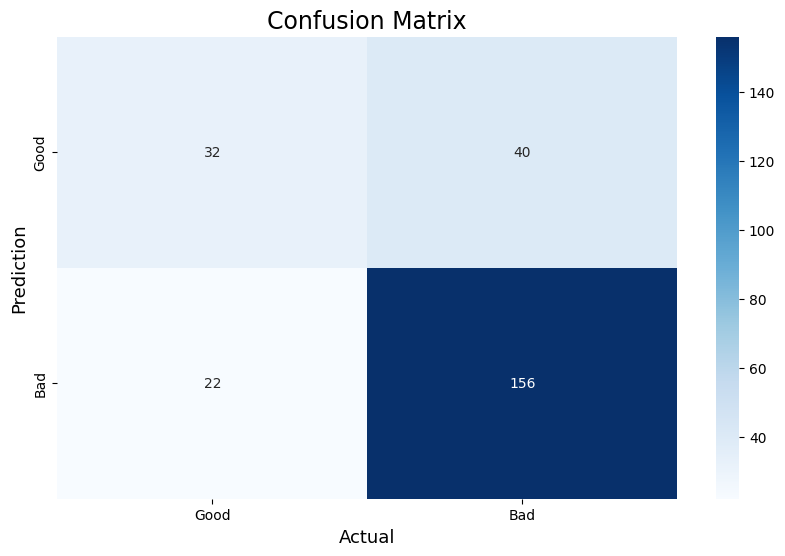

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_LG, annot=True, fmt="d", cmap="Blues",xticklabels=['Good','Bad'], yticklabels=['Good','Bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for LG',fontsize=17)
plt.show()


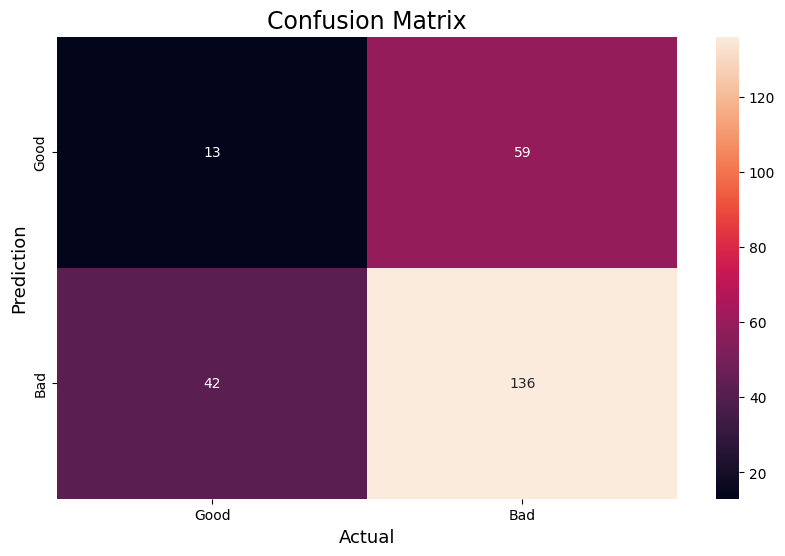

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_KNN, annot=True, fmt="d",xticklabels=['Good','Bad'], yticklabels=['Good','Bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for KNN',fontsize=17)
plt.show()


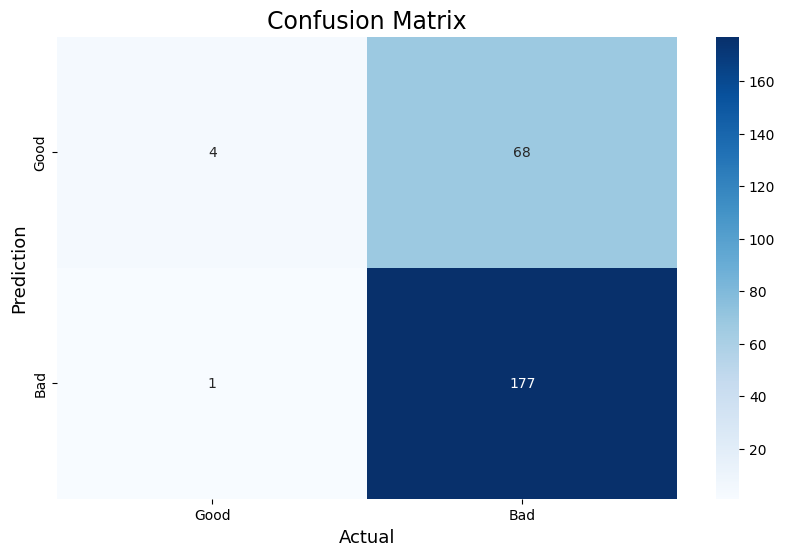

In [163]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_SVM, annot=True, fmt="d", cmap="Blues",xticklabels=['Good','Bad'], yticklabels=['Good','Bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for SVM',fontsize=17)
plt.show()


In [164]:
report_LG = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report_LG}')

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        72
           1       0.80      0.88      0.83       178

    accuracy                           0.75       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.74      0.75      0.74       250



In [165]:
report_KNN = classification_report(y_test, y_pred_knn)
print(f'Classification Report:\n{report_KNN}')

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.06      0.10        72
           1       0.72      0.98      0.83       178

    accuracy                           0.72       250
   macro avg       0.65      0.52      0.47       250
weighted avg       0.68      0.72      0.62       250



In [166]:
report_SVM = classification_report(y_test, y_pred_svm)
print(f'Classification Report:\n{report_LG}')

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        72
           1       0.80      0.88      0.83       178

    accuracy                           0.75       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.74      0.75      0.74       250

